In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import random
import time
#PATH PROCESS
import os
import os.path
from pathlib import Path
import glob
#IMAGE PROCESS
from PIL import Image
from keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing.image import load_img
import cv2
from keras.applications.vgg16 import preprocess_input, decode_predictions
from keras.preprocessing import image
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input
from mxnet import image, np, npx
#SCALER & TRANSFORMATION
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from keras.utils.np_utils import to_categorical
from sklearn.model_selection import train_test_split
from keras import regularizers
from sklearn.preprocessing import LabelEncoder
#ACCURACY CONTROL
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, roc_auc_score, roc_curve
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.metrics import mean_squared_error, r2_score
#OPTIMIZER
from tensorflow.keras.optimizers import RMSprop,Adam,Optimizer,Optimizer, SGD
#MODEL LAYERS
from tensorflow.keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D, BatchNormalization,MaxPooling2D,BatchNormalization,\
                        Permute, TimeDistributed, Bidirectional,GRU, SimpleRNN, LSTM, GlobalAveragePooling2D, SeparableConv2D, ZeroPadding2D, Convolution2D, ZeroPadding2D
from keras import models
from keras import layers
import tensorflow as tf
from tensorflow.keras.applications import VGG16,VGG19,inception_v3
from keras import backend as K
from tensorflow.keras.utils import plot_model
from keras.models import load_model
#SKLEARN CLASSIFIER
from xgboost import XGBClassifier, XGBRegressor
from lightgbm import LGBMClassifier, LGBMRegressor
from catboost import CatBoostClassifier, CatBoostRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.ensemble import GradientBoostingClassifier, GradientBoostingRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.neural_network import MLPClassifier, MLPRegressor
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.cross_decomposition import PLSRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import Lasso
from sklearn.linear_model import LassoCV
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import ElasticNetCV
#IGNORING WARNINGS
from warnings import filterwarnings
filterwarnings("ignore",category=DeprecationWarning)
filterwarnings("ignore", category=FutureWarning) 
filterwarnings("ignore", category=UserWarning)

#PLOT TYPE
plt.style.use("classic")

In [3]:
Data_Path = Path("../Dataset")

In [4]:
PNG_Path = list(Data_Path.glob(r"*/*.png"))

In [5]:
PNG_Labels = list(map(lambda x: os.path.split(os.path.split(x)[0])[1],PNG_Path))

In [6]:
PNG_Path_Series = pd.Series(PNG_Path,name="PNG").astype(str)
PNG_Labels_Series = pd.Series(PNG_Labels,name="CATEGORY")

In [7]:
Main_Data = pd.concat([PNG_Path_Series,PNG_Labels_Series],axis=1)


In [8]:
print(Main_Data.head(-1))


                                            PNG               CATEGORY
0        ..\Dataset\mask_weared_incorrect\1.png  mask_weared_incorrect
1       ..\Dataset\mask_weared_incorrect\10.png  mask_weared_incorrect
2      ..\Dataset\mask_weared_incorrect\100.png  mask_weared_incorrect
3     ..\Dataset\mask_weared_incorrect\1000.png  mask_weared_incorrect
4     ..\Dataset\mask_weared_incorrect\1001.png  mask_weared_incorrect
...                                         ...                    ...
8976               ..\Dataset\with_mask\994.png              with_mask
8977               ..\Dataset\with_mask\995.png              with_mask
8978               ..\Dataset\with_mask\996.png              with_mask
8979               ..\Dataset\with_mask\997.png              with_mask
8980               ..\Dataset\with_mask\998.png              with_mask

[8981 rows x 2 columns]


In [9]:
print(Main_Data["CATEGORY"].value_counts())

mask_weared_incorrect    2994
without_mask             2994
with_mask                2994
Name: CATEGORY, dtype: int64


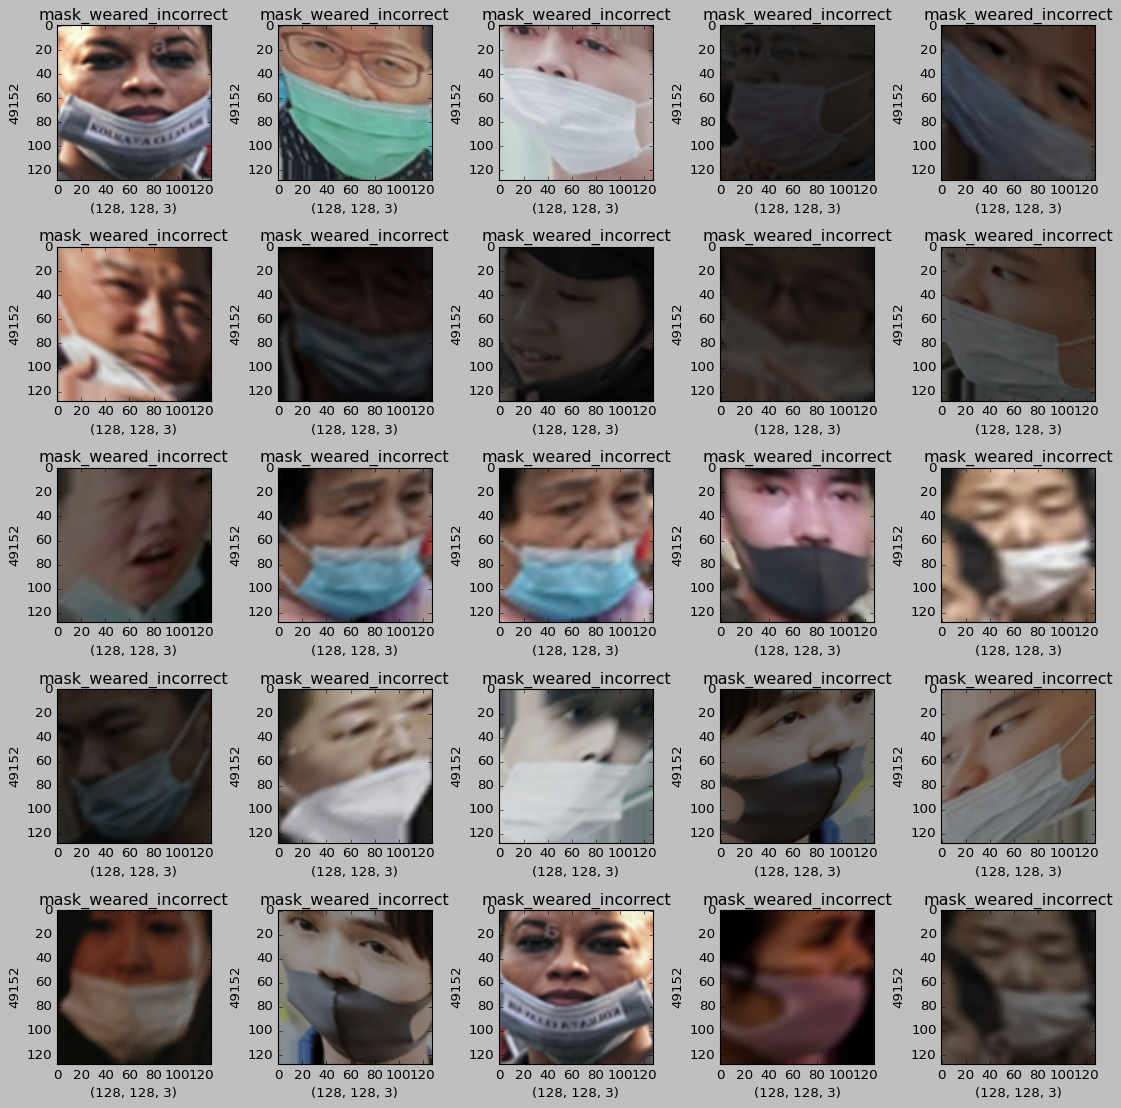

In [10]:
figure,axis = plt.subplots(nrows=5,ncols=5,figsize=(14,14))

for indexing,run_axes in enumerate(axis.flat):
    Reading_IMG = cv2.imread(Main_Data["PNG"][indexing])
    Transformation_IMG = cv2.cvtColor(Reading_IMG,cv2.COLOR_BGR2RGB)
    
    run_axes.set_xlabel(Transformation_IMG.shape)
    run_axes.set_ylabel(Transformation_IMG.size)
    run_axes.set_title(Main_Data["CATEGORY"][indexing])
    
    run_axes.imshow(Transformation_IMG)
    
plt.tight_layout()
plt.show()

In [11]:
Train_Data,Test_Data = train_test_split(Main_Data,train_size=0.9,shuffle=True,random_state=42)

In [12]:
print(Train_Data.shape)
print(Test_Data.shape)

(8083, 2)
(899, 2)


In [14]:
Train_IMG_Generator = ImageDataGenerator(rescale=1./255,
                                        rotation_range=25,
                                        shear_range=0.5,
                                        zoom_range=0.5,
                                        width_shift_range=0.2,
                                        height_shift_range=0.2,
                                        horizontal_flip=True,
                                        fill_mode="nearest",
                                        validation_split=0.1)

In [15]:
Test_IMG_Generator = ImageDataGenerator(rescale=1./255)


In [16]:
Train_IMG_Set = Train_IMG_Generator.flow_from_dataframe(dataframe=Train_Data,
                                                       x_col="PNG",
                                                       y_col="CATEGORY",
                                                       color_mode="rgb",
                                                       class_mode="categorical",
                                                       target_size=(128,128),
                                                       subset="training")

Found 7275 validated image filenames belonging to 3 classes.


In [17]:
Validation_IMG_Set = Train_IMG_Generator.flow_from_dataframe(dataframe=Train_Data,
                                                       x_col="PNG",
                                                       y_col="CATEGORY",
                                                       color_mode="rgb",
                                                       class_mode="categorical",
                                                       target_size=(128,128),
                                                       subset="validation")

Found 808 validated image filenames belonging to 3 classes.


In [18]:
Test_IMG_Set = Test_IMG_Generator.flow_from_dataframe(dataframe=Test_Data,
                                                       x_col="PNG",
                                                       y_col="CATEGORY",
                                                       color_mode="rgb",
                                                       class_mode="categorical",
                                                       target_size=(128,128),
                                                       shuffle=False)

Found 899 validated image filenames belonging to 3 classes.


In [19]:
print("TRAIN: ")
print(Train_IMG_Set.class_indices)
print(Train_IMG_Set.classes[0:5])
print(Train_IMG_Set.image_shape)
print("---"*20)
print("VALIDATION: ")
print(Validation_IMG_Set.class_indices)
print(Validation_IMG_Set.classes[0:5])
print(Validation_IMG_Set.image_shape)
print("---"*20)
print("TEST: ")
print(Test_IMG_Set.class_indices)
print(Test_IMG_Set.classes[0:5])
print(Test_IMG_Set.image_shape)

TRAIN: 
{'mask_weared_incorrect': 0, 'with_mask': 1, 'without_mask': 2}
[0, 0, 2, 0, 0]
(128, 128, 3)
------------------------------------------------------------
VALIDATION: 
{'mask_weared_incorrect': 0, 'with_mask': 1, 'without_mask': 2}
[0, 2, 1, 0, 2]
(128, 128, 3)
------------------------------------------------------------
TEST: 
{'mask_weared_incorrect': 0, 'with_mask': 1, 'without_mask': 2}
[1, 0, 0, 1, 1]
(128, 128, 3)


In [20]:
Model = Sequential()

#
Model.add(Conv2D(32,(3,3),activation="relu",input_shape=(128,128,3)))
Model.add(BatchNormalization())
Model.add(MaxPooling2D((2,2)))

#
Model.add(Conv2D(64,(3,3),padding="same",activation="relu"))
Model.add(Dropout(0.3))
Model.add(MaxPooling2D((2,2)))

Model.add(Conv2D(128,(3,3),padding="same",activation="relu"))
Model.add(Dropout(0.3))
Model.add(MaxPooling2D((2,2)))

Model.add(Conv2D(128,(3,3),padding="same",activation="relu"))
Model.add(Dropout(0.3))
Model.add(MaxPooling2D((2,2)))

#
Model.add(Flatten())
Model.add(Dense(256,activation="relu"))
Model.add(Dropout(0.5))

#
Model.add(Dense(3,activation="softmax"))

In [21]:
Early_Stop = tf.keras.callbacks.EarlyStopping(monitor="loss",patience=3,mode="min")
Model.compile(optimizer="adam",loss="categorical_crossentropy",metrics=["accuracy"])


In [22]:
print(Model.summary())


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 126, 32)      896       
                                                                 
 batch_normalization (BatchN  (None, 126, 126, 32)     128       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 63, 63, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 63, 63, 64)        18496     
                                                                 
 dropout (Dropout)           (None, 63, 63, 64)        0         
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 31, 31, 64)       0

In [29]:
CNN_Sep_Model = Model.fit(Train_IMG_Set,validation_data=Validation_IMG_Set,callbacks=Early_Stop,epochs=50)

Epoch 1/50
228/228 [==============================] - 119s 520ms/step - loss: 0.5937 - accuracy: 0.7682 - val_loss: 0.9464 - val_accuracy: 0.5433
Epoch 2/50
228/228 [==============================] - 82s 358ms/step - loss: 0.4635 - accuracy: 0.8219 - val_loss: 0.6273 - val_accuracy: 0.8106
Epoch 3/50
228/228 [==============================] - 83s 362ms/step - loss: 0.3842 - accuracy: 0.8503 - val_loss: 0.5223 - val_accuracy: 0.8515
Epoch 4/50
228/228 [==============================] - 82s 357ms/step - loss: 0.3443 - accuracy: 0.8737 - val_loss: 0.4595 - val_accuracy: 0.8651
Epoch 5/50
228/228 [==============================] - 81s 356ms/step - loss: 0.3090 - accuracy: 0.8895 - val_loss: 0.4254 - val_accuracy: 0.8787
Epoch 6/50
228/228 [==============================] - 80s 349ms/step - loss: 0.2803 - accuracy: 0.9031 - val_loss: 0.3567 - val_accuracy: 0.8899
Epoch 7/50
228/228 [==============================] - 82s 361ms/step - loss: 0.2912 - accuracy: 0.8976 - val_loss: 0.3942 - val_a

<AxesSubplot:>

<Figure size 800x800 with 0 Axes>

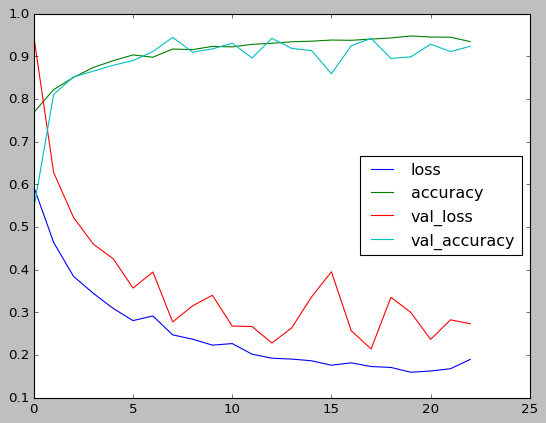

In [30]:
Grap_Data = pd.DataFrame(CNN_Sep_Model.history)
figure = plt.figure(figsize=(10,10))

Grap_Data.plot()

In [38]:
interp = ClassificationInterpretation.from_learner(CNN_Sep_Model)
interp.plot_confusion_matrix()


NameError: name 'ClassificationInterpretation' is not defined

No handles with labels found to put in legend.


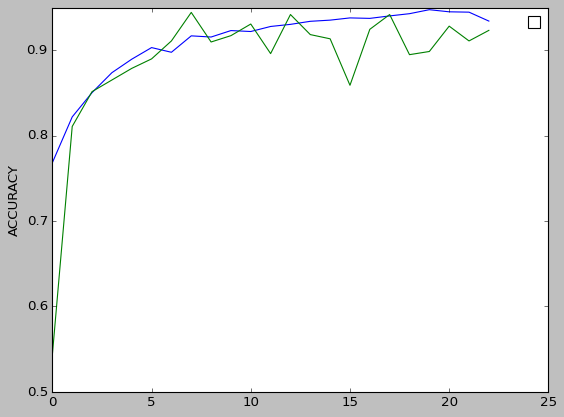

In [31]:
plt.plot(CNN_Sep_Model.history["accuracy"])
plt.plot(CNN_Sep_Model.history["val_accuracy"])
plt.ylabel("ACCURACY")
plt.legend()
plt.show()

No handles with labels found to put in legend.


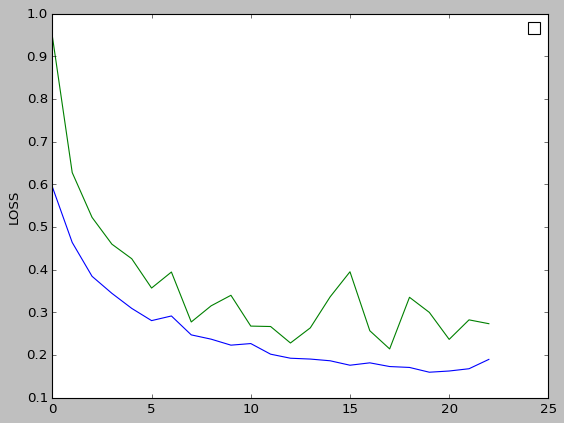

In [32]:
plt.plot(CNN_Sep_Model.history["loss"])
plt.plot(CNN_Sep_Model.history["val_loss"])
plt.ylabel("LOSS")
plt.legend()
plt.show()

In [33]:
Model.save("main_model.h5")
Model.save_weights("main_model_weight.h5")

In [34]:
Model_Results = Model.evaluate(Test_IMG_Set)
print("LOSS:  " + "%.4f" % Model_Results[0])
print("ACCURACY:  " + "%.4f" % Model_Results[1])

29/29 [==============================] - 6s 198ms/step - loss: 0.1485 - accuracy: 0.9689
LOSS:  0.1485
ACCURACY:  0.9689


In [40]:
Model_Results=Model.evaluate(Test_IMG_Set, return_dict=True)


29/29 [==============================] - 2s 57ms/step - loss: 0.1485 - accuracy: 0.9689


In [35]:
Prediction_Number = Model.predict(Test_IMG_Set)

print(Prediction_Number[0:10])

[[2.4772655e-02 5.6494176e-01 4.1028559e-01]
 [9.1650790e-01 7.1623050e-02 1.1869104e-02]
 [9.5723790e-01 3.9297030e-03 3.8832467e-02]
 [1.4218768e-01 7.6684064e-01 9.0971656e-02]
 [8.4432220e-01 1.4992790e-01 5.7499195e-03]
 [3.8151935e-02 9.2286533e-01 3.8982779e-02]
 [5.6992695e-02 7.4700631e-02 8.6830664e-01]
 [1.5770641e-01 7.6044673e-01 8.1846856e-02]
 [1.4549133e-01 7.9240757e-01 6.2101182e-02]
 [9.9593914e-01 3.1953817e-03 8.6555100e-04]]


In [36]:
Prediction = Prediction_Number.argmax(axis=-1)
print(Prediction[0:10])

[1 0 0 1 0 1 2 1 1 0]


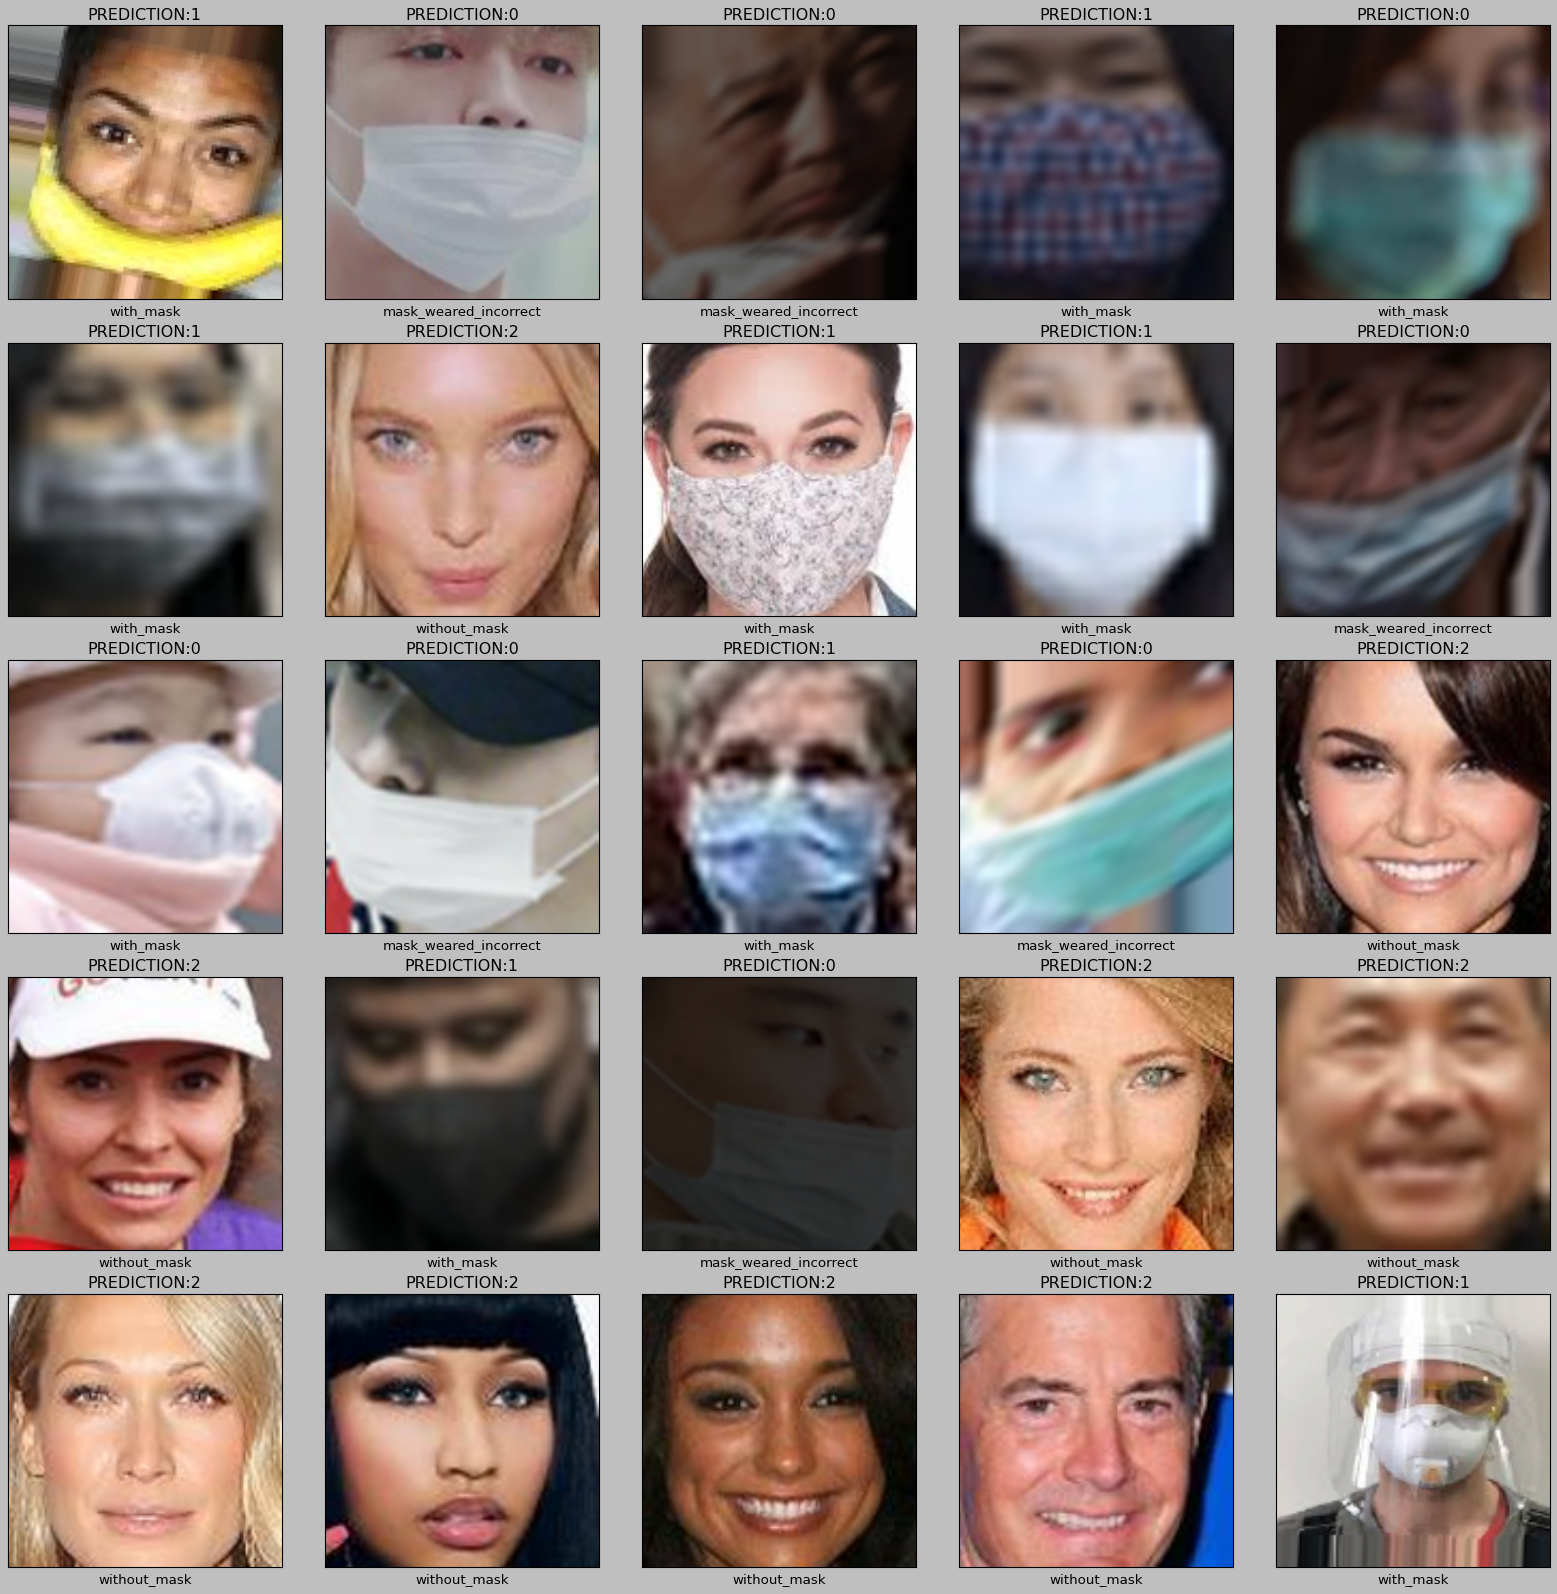

In [37]:
fig, axes = plt.subplots(nrows=5,
                         ncols=5,
                         figsize=(20, 20),
                        subplot_kw={'xticks': [], 'yticks': []})

for i, ax in enumerate(axes.flat):
    ax.imshow(plt.imread(Test_Data["PNG"].iloc[i]))
    ax.set_title(f"PREDICTION:{Prediction[i]}")
    ax.set_xlabel(Test_Data["CATEGORY"].iloc[i])
plt.tight_layout()
plt.show()

# ResNet50

In [29]:
from keras.callbacks import ModelCheckpoint, EarlyStopping

Early_Stop_2 = tf.keras.callbacks.EarlyStopping(monitor = 'val_loss', patience = 3)
Checkpointer_2 = ModelCheckpoint(filepath = 'best.hdf5', monitor = 'val_loss', save_best_only = True, mode = 'auto')

In [30]:
from tensorflow.keras.applications import ResNet50

model_2 = Sequential()

model_2.add(tf.keras.applications.resnet50.ResNet50(include_top = False, pooling = max  , weights = 'imagenet'))

model_2.add(Dense(3, activation = "softmax"))

model_2.layers[0].trainable = False

In [31]:
from tensorflow.keras import optimizers

sgd = optimizers.SGD(lr = 0.01, decay = 1e-6, momentum = 0.9, nesterov = True)
model_2.compile(optimizer = sgd, loss = "categorical_crossentropy", metrics = ['accuracy'])

In [32]:
print(model_2.summary())


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, None, None, 2048)  23587712  
                                                                 
 dense_3 (Dense)             (None, None, None, 3)     6147      
                                                                 
Total params: 23,593,859
Trainable params: 6,147
Non-trainable params: 23,587,712
_________________________________________________________________
None


In [33]:
ResNet = model_2.fit(
        Train_IMG_Set,
#         steps_per_epoch=10,
        epochs = 10,
        validation_data=Validation_IMG_Set,
#         validation_steps=10,
        callbacks=[Checkpointer_2, Early_Stop_2]
)
model_2.load_weights("best.hdf5")

Epoch 1/10


ValueError: in user code:

    File "C:\Users\Kepan\miniconda3\envs\gpu2\lib\site-packages\keras\engine\training.py", line 878, in train_function  *
        return step_function(self, iterator)
    File "C:\Users\Kepan\miniconda3\envs\gpu2\lib\site-packages\keras\engine\training.py", line 867, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "C:\Users\Kepan\miniconda3\envs\gpu2\lib\site-packages\keras\engine\training.py", line 860, in run_step  **
        outputs = model.train_step(data)
    File "C:\Users\Kepan\miniconda3\envs\gpu2\lib\site-packages\keras\engine\training.py", line 809, in train_step
        loss = self.compiled_loss(
    File "C:\Users\Kepan\miniconda3\envs\gpu2\lib\site-packages\keras\engine\compile_utils.py", line 201, in __call__
        loss_value = loss_obj(y_t, y_p, sample_weight=sw)
    File "C:\Users\Kepan\miniconda3\envs\gpu2\lib\site-packages\keras\losses.py", line 141, in __call__
        losses = call_fn(y_true, y_pred)
    File "C:\Users\Kepan\miniconda3\envs\gpu2\lib\site-packages\keras\losses.py", line 245, in call  **
        return ag_fn(y_true, y_pred, **self._fn_kwargs)
    File "C:\Users\Kepan\miniconda3\envs\gpu2\lib\site-packages\keras\losses.py", line 1664, in categorical_crossentropy
        return backend.categorical_crossentropy(
    File "C:\Users\Kepan\miniconda3\envs\gpu2\lib\site-packages\keras\backend.py", line 4994, in categorical_crossentropy
        target.shape.assert_is_compatible_with(output.shape)

    ValueError: Shapes (None, None) and (None, None, None, 3) are incompatible
